**a)** Finding the equation for the decision boundary

We have that $p = \frac{e^{\beta_0 + \beta_1 x_1 + \beta_2 x_2}}{1 + e^{\beta_0 + \beta_1 x_1 + \beta_2 x_2}} = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}}$ by the definition of logistic regression. 

Since our decision boundary is just an equal boundary, we want to solve $x_1 = f(x_2)$, using the following equation:

\begin{align*}
0.5 = \frac{1}{1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}}
\\
\implies 2 = 1 + e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}
\\
\implies 1 = e^{-(\beta_0 + \beta_1 x_1 + \beta_2 x_2)}
\\
\\
\implies 0 = -\beta_0 - \beta_1 x_1 - \beta_2 x_2
\\
\implies \beta_1 x_1 = -\beta_0 - \beta_2 x_2
\\
\implies x_1 = -\frac{\beta_0}{\beta_1} - \frac{\beta_2}{\beta_1} x_2
\\
\implies x_1 = -\left(\frac{\beta_2}{\beta_1} x_2 + \frac{\beta_0}{\beta_1}\right)
\end{align*}

Therefore, $x_1 = f(x_2) = -\left(\frac{\beta_2}{\beta_1} x_2 + \frac{\beta_0}{\beta_1}\right)$ gives the decision boundary. $\square$

**b)** Model Fitting

In [2]:
library(caret)
library(tidyverse)

Loading required package: ggplot2

Loading required package: lattice

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.3     v readr     2.1.4
v forcats   1.0.0     v stringr   1.5.0
v lubridate 1.9.3     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
x purrr::lift()   masks caret::lift()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [9]:
# read in the dataset
path = "./stature_Turkey.csv"
data = read.csv(path)
# make an indicator "Female"
Female = ifelse(data$Gender == "Female", 1, 0)
# bind the Female column to the data
data = cbind(data, Female)

In [12]:
# fit the regression on the req'd variables
form_reg = Female ~ Stature + Hand
# fit the model
model = glm(formula = form_reg, data = data, family = binomial)
# summarize the model
summary(model)


Call:
glm(formula = form_reg, family = binomial, data = data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept) 157.6410    31.1380   5.063 4.13e-07 ***
Stature      -1.1646     0.2748  -4.238 2.26e-05 ***
Hand          0.1925     0.1065   1.808   0.0707 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 214.714  on 154  degrees of freedom
Residual deviance:  47.093  on 152  degrees of freedom
AIC: 53.093

Number of Fisher Scoring iterations: 8


**c)** Plotting $x_1$ and $x_2$

In [22]:
# extract the coefficients from the model
beta_0 = model$coefficients[1]
beta_1 = model$coefficients[2]
beta_2 = model$coefficients[3]
# evaluate the decision boundary (for plotting)
db = -((beta_2/beta_1)*data$Hand + (beta_0/beta_1))

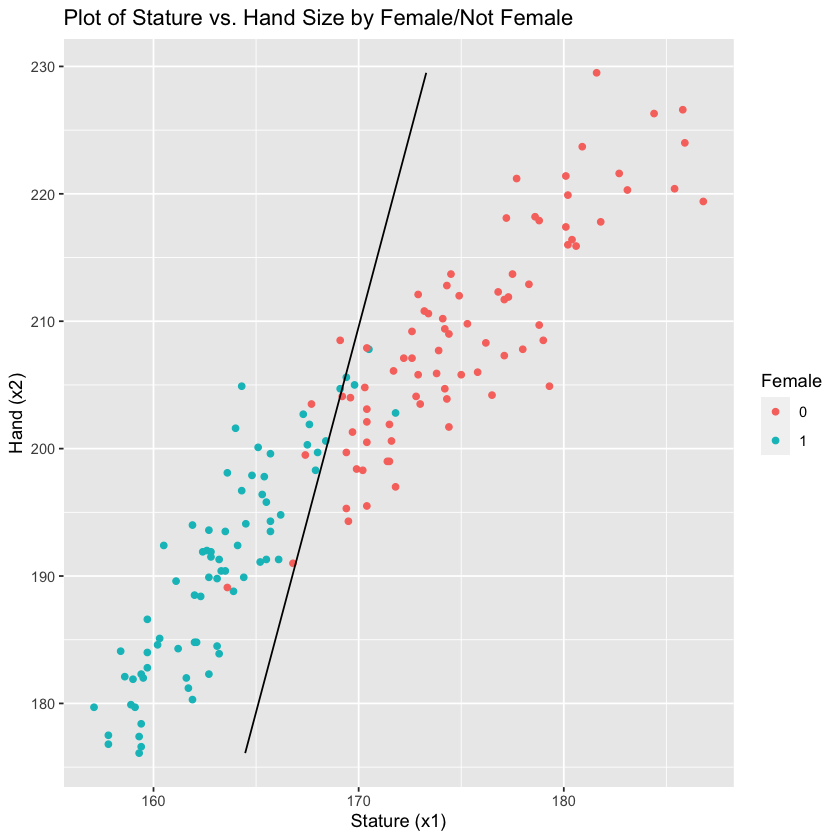

In [61]:
plo = data %>% ggplot(mapping = aes(x = Stature, y = Hand, colour = as.factor(Female))) + geom_point() + 
    geom_line(mapping = aes(x = db), colour = "black") + scale_colour_discrete(name = "Female") + 
    xlab("Stature (x1)") + ylab("Hand (x2)") + ggtitle("Plot of Stature vs. Hand Size by Female/Not Female")
plo

**d)** Smaller height ?-> Female? 

Looking at the odds ratio, we have $\beta_{\text{stature}} = -1.1646 \implies \text{Odds Ratio} = e^{\beta_{\text{stature}}} \approx 0.31$.

So, for every 1cm of height gained, assuming that hand size is held constant, your odds of being female decrease by a factor of approximately 0.31. So yes, assuming that hand size is constant, it can be said that a smaller height means it is more likely that the subject is female, through the computed odds ratio. 

This is also a very significant coefficient, with $p-\text{value} = 2.26*10^{-5} << 0.05 = \alpha$.

As we can see from the above plot, this is a pretty reasonable conclusion to draw - the female values on the scatter plot tend to lie near lower stature values. 

**e)** Smaller hand ?-> Female? 

Looking at the odds ratio, we have $\beta_{\text{hand}} = 0.1925 \implies \text{Odds Ratio} = e^{\beta_{\text{hand}}} \approx 1.21$.

So, for every 1mm in additional distance between the distal wrist crease and distal end of the longest finger, assuming height is held constant, your odds of being female increase by a factor of approximately 1.21. So, assuming height is held constant, it can be inferred from the model that as the aforementioned distance grows, the more likely it is that the subject is female. 

However, this must be taken with a grain of salt. For one, we have a statistically insignificant coefficient, as we have an associated $p-\text{value} = 0.0707 > 0.05 = \alpha$. In addition, from the plot above, we can see that most of the points with smaller values are, in fact, female.

Given this p-value, and the graphical summary, it is difficult to suggest that the hand size is associated with the probability of being female. 